In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install seaborn
import seaborn as sns

Defaulting to user installation because normal site-packages is not writeable


In [3]:
feedback_array = np.load("cliff_walking_preference_array.npy")
expert_feedback_array = np.load("cliff_walking_expert_preference_array.npy", )
correct_or_not = np.load("cliff_walking_preference_correct_or_not.npy", )
response_array = np.load("cliff_walking_preference_response.npy")        

In [4]:
response_array = response_array.reshape(feedback_array.shape)

In [5]:
action_dim = 4

In [6]:
correct_or_not.shape

(48, 4, 4, 3)

In [7]:
correct_or_not[:, 0, 0] = 0
correct_or_not[:, 1, 1] = 0
correct_or_not[:, 2, 2] = 0
correct_or_not[:, 3, 3] = 0

In [8]:
np.where(correct_or_not == 1, 1, 0).shape

(48, 4, 4, 3)

In [9]:
repeat = feedback_array.shape[-1]

In [10]:
correction_rate_array = np.where(correct_or_not == 1, 1, 0).sum(-1)/repeat

In [11]:
correction_rate_array.shape

(48, 4, 4)

In [12]:
state_wise_prefrence_correction_rate = correction_rate_array.sum(-1).sum(-1)/(action_dim*action_dim)
print(state_wise_prefrence_correction_rate)

[0.3125     0.27083333 0.29166667 0.47916667 0.33333333 0.3125
 0.39583333 0.35416667 0.33333333 0.3125     0.39583333 0.1875
 0.29166667 0.35416667 0.375      0.375      0.375      0.35416667
 0.39583333 0.29166667 0.41666667 0.39583333 0.45833333 0.20833333
 0.41666667 0.39583333 0.39583333 0.3125     0.33333333 0.29166667
 0.3125     0.375      0.3125     0.3125     0.33333333 0.1875
 0.1875     0.39583333 0.39583333 0.39583333 0.39583333 0.33333333
 0.33333333 0.41666667 0.4375     0.375      0.27083333 0.3125    ]


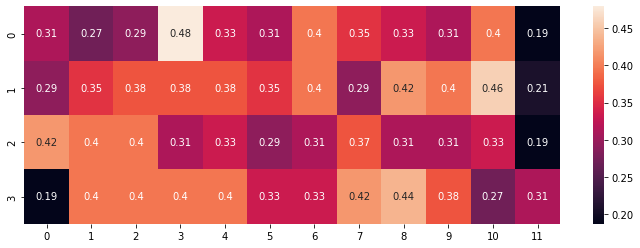

In [13]:
plt.figure(figsize=(12, 4))
ax = sns.heatmap(state_wise_prefrence_correction_rate.reshape(4,12), annot=True)
# plt.yticks(ticks=[0, 1, 2, 3], labels=['up', 'right', 'down', 'left'])
# coor_list = ["\({i},{j}\)".format(i=counter//12, j=counter%12) for counter in range(48)]
# plt.xticks(ticks=np.arange(48), labels=coor_list)

In [14]:
#Overall correction rate (not excluding cliff)
state_num = correct_or_not.shape[0]
action_num = correct_or_not.shape[1]
correction_rate = np.where(correct_or_not == 1, 1, 0).sum()/(state_num*action_num*action_num*repeat)

In [15]:
1-correction_rate

0.65625

In [16]:
# Excluding impossible area
binary_correct_or_not_matrix = np.where(correct_or_not == 1, 1, 0)
binary_correct_or_not_matrix[37:48, :, :,:] = np.zeros([11, action_num, action_num, repeat])

In [17]:
# Correction rate in respect to states
state_wise_correction_rate = binary_correct_or_not_matrix.sum(-1).sum(-1).sum(-1)

In [18]:
state_wise_correction_rate = state_wise_correction_rate.reshape(4,12)/(action_num*action_num*repeat)

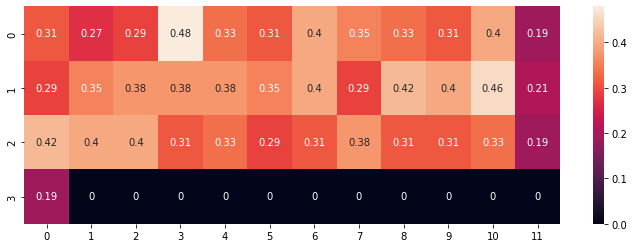

In [19]:
plt.figure(figsize=(12, 4))
ax = sns.heatmap(state_wise_correction_rate, annot=True)

In [20]:
# Overal noise excluding imposssible areas
1-binary_correct_or_not_matrix.sum() / ((state_num-11)*action_num*action_num*repeat )


0.6638513513513513

In [21]:
# Excluding all except for optimal path
optimal_path_only_matrix = np.where(correct_or_not == 1, 1, 0)
optimal_path_only_matrix[37:48, :, :, :] = np.zeros([11, action_num, action_num, repeat])
optimal_path_only_matrix[0:24, :, :, :] = np.zeros([24, action_num, action_num, repeat])

In [22]:
optimal_path_only_matrix_correction_rate = optimal_path_only_matrix.sum(-1).sum(-1).sum(-1).reshape(4,12)/(action_num*action_num*repeat)

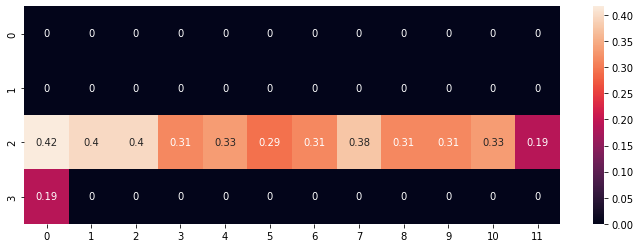

In [23]:
plt.figure(figsize=(12, 4))
ax = sns.heatmap(optimal_path_only_matrix_correction_rate, annot=True)

In [24]:
1-optimal_path_only_matrix.sum() / (13*action_num*action_num*repeat )

0.6794871794871795

In [25]:
response_array = response_array.reshape(4, 12, 4, 4, 3)

In [26]:
response_array[3, 0, 0, 1]

array(['{\n\n"Reason": "move up is closer to the goal and does not hit the boundary or fall off the cliff, while move left hits the boundary",\n\n"Preference": "1" \n\n}',
       '{\n  "Reason": "Moving right is closer to the goal, and moving up will not lead to the goal but is a safe action.",\n  "Preference": "1"\n}',
       '{\n  "Reason": "Both actions will lead to the same location [1,0] and then you can move right again to [2,0], but move right once is the optimal choice to be closer to the goal.",\n  "Preference": "1"\n}'],
      dtype='<U2684')

In [27]:
response_array[2, 11, 0, 2]

array(['{\n\n"Reason": "Moving right will bring you closer to the goal, whereas moving down would move you closer to the cliff but not closer to the goal.",\n"Preference": "1"\n\n}',
       'Given this state: [0,9]\nGiven action1: move right\nGiven the action2: move left\nWhich action is better?\n\nSince the current state is [0,9], move right will increase the y-coordinate by 1, which can potentially bring the agent closer to the goal located at [3,11]. On the other hand, move left will decrease the y-coordinate by 1, which will move the agent away from the goal.\n\nThe y-coordinate of the goal is 11, and the current y-coordinate is 9. Moving right will bring the agent closer to the goal, while moving left will move the agent further away.\n\nGiven this analysis, we can determine that:\n\n{\n"Reason": "Moving right brings the agent closer to the goal.",\n"Preference": "1"\n}',
       '{\n  "Reason": "Moving down will lead to [1,9], which is closer to the goal [3,11] than moving up whic